In [72]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [73]:
data = pd.read_csv('train_u6lujuX_CVtuZ9i (1).csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [74]:
data =data.drop('Loan_ID',axis =1)

In [75]:
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [76]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [77]:
data['Gender'].fillna(data['Gender'].mode()[0],inplace = True)
data['Married'].fillna(data['Married'].mode()[0],inplace = True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace =True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace = True)

C:\Users\HP\AppData\Local\Temp\ipykernel_1632\2834364652.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\HP\AppData\Local\Temp\ipykernel_1632\2834364652.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [78]:
data['LoanAmount'].fillna(data['LoanAmount'].median(),inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0],inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0],inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_1632\2967774087.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\HP\AppData\Local\Temp\ipykernel_1632\2967774087.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [79]:
import plotly.express as px
loan_status_count = data['Loan_Status'].value_counts()
fig = px.pie(loan_status_count,names = loan_status_count.index,title = 'Loan Approval Status')
fig.show()

In [80]:
gender_count = data['Gender'].value_counts()
fig = px.bar(gender_count,x = gender_count.index,
            y = gender_count.values,
            title = 'Gender Distribution')
fig.show()

In [81]:
married_count = data['Married'].value_counts()
fig = px.bar(married_count,
            x = married_count.index,
            y = married_count.values,
            title = 'Marital Status Distribution')
fig.show()

In [82]:
education_count = data['Education'].value_counts()
fig = px.bar(education_count,
            x = education_count.index,
            y = education_count.values,
            title = 'Educational Status Distribution')
fig.show()

In [83]:
self_employ_count = data['Self_Employed'].value_counts()
fig = px.bar(self_employ_count,
            x = self_employ_count.index,
            y = self_employ_count.values,
            title = 'Self Employment Status Distribution')
fig.show()

In [84]:
fig = px.histogram(data, x= 'ApplicantIncome',title = 'Applicant Income Distribution')
fig.show()

In [85]:
fig_income = px.box(data, x='Loan_Status', 
                    y='ApplicantIncome',
                    color="Loan_Status", 
                    title='Loan_Status vs ApplicantIncome')
fig_income.show()

In [86]:
# Calculate the IQR
Q1 = data['ApplicantIncome'].quantile(0.25)
Q3 = data['ApplicantIncome'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data = data[(data['ApplicantIncome'] >= lower_bound) & (data['ApplicantIncome'] <= upper_bound)]

In [87]:
fig_coapplicant_income = px.box(data, 
                                x='Loan_Status', 
                                y='CoapplicantIncome',
                                color="Loan_Status", 
                                title='Loan_Status vs CoapplicantIncome')
fig_coapplicant_income.show()

In [88]:
Q1 = data['CoapplicantIncome'].quantile(0.25)
Q3 = data['CoapplicantIncome'].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

data = data[(data['CoapplicantIncome'] >= lower_bound) & (data['CoapplicantIncome'] <= upper_bound)]

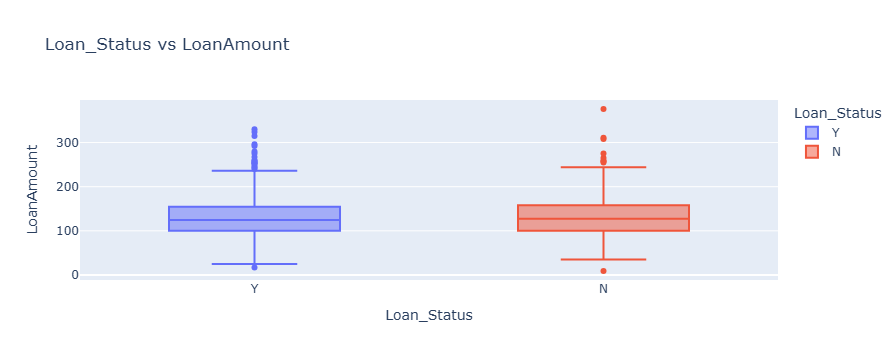

In [89]:
fig_loan_amount = px.box(data, x='Loan_Status', 
                         y='LoanAmount', 
                         color="Loan_Status",
                         title='Loan_Status vs LoanAmount')
fig_loan_amount.show()

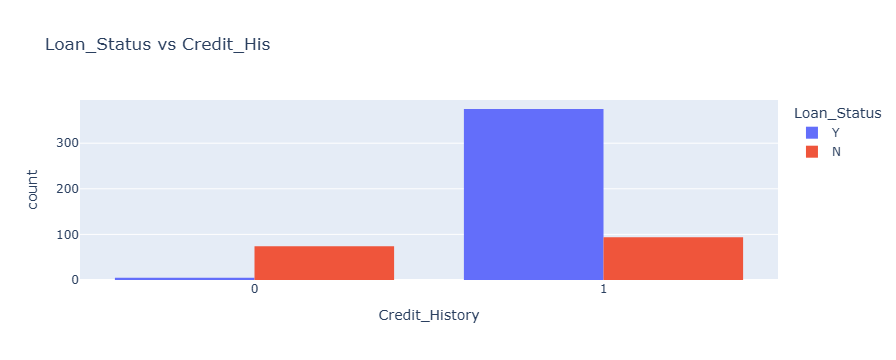

In [90]:
fig_credit_history = px.histogram(data, x='Credit_History', color='Loan_Status', 
                                  barmode='group',
                                  title='Loan_Status vs Credit_His')
fig_credit_history.show()

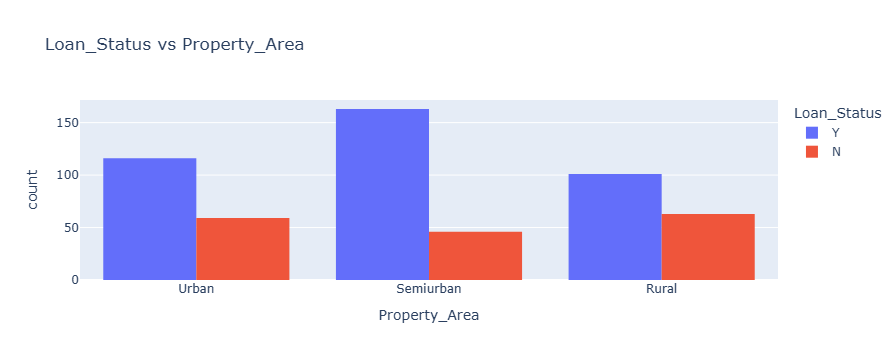

In [91]:
fig_property_area = px.histogram(data, x='Property_Area', color='Loan_Status', 
                                 barmode='group',
                                title='Loan_Status vs Property_Area')
fig_property_area.show()

In [92]:
cat_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
data = pd.get_dummies(data, columns=cat_cols)

X = data.drop('Loan_Status', axis =1)
y  =data['Loan_Status']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

scaler = StandardScaler()
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
X_train[numerical_cols] =scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

from sklearn.svm import SVC
model = SVC(random_state = 42)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
y_pred

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y'], dtype=object)

In [94]:
# Convert X_test to a DataFrame
X_test_df = pd.DataFrame(X_test, columns=X_test.columns)

# Add the predicted values to X_test_df
X_test_df['Loan_Status_Predicted'] = y_pred
X_test_df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Predicted
277,-0.544528,-0.037922,-0.983772,0.305159,0.402248,False,True,False,True,True,...,False,False,True,False,True,False,False,False,True,Y
84,-0.067325,-0.931554,-1.571353,-1.430680,0.402248,False,True,False,True,False,...,False,False,True,False,True,False,False,False,True,Y
275,-0.734870,0.334654,-0.298262,0.305159,0.402248,False,True,False,True,False,...,False,False,True,False,True,False,False,True,False,Y
392,-0.824919,0.522317,-0.200332,0.305159,0.402248,False,True,False,True,True,...,False,False,True,False,True,False,False,False,True,Y
537,-0.267373,-0.931554,-0.454950,0.305159,0.402248,False,True,True,False,False,...,True,False,True,False,True,False,False,True,False,Y
